Saved generated_images/cumulative_shapes_1.png with 1 shape(s) at 384x384 resolution.


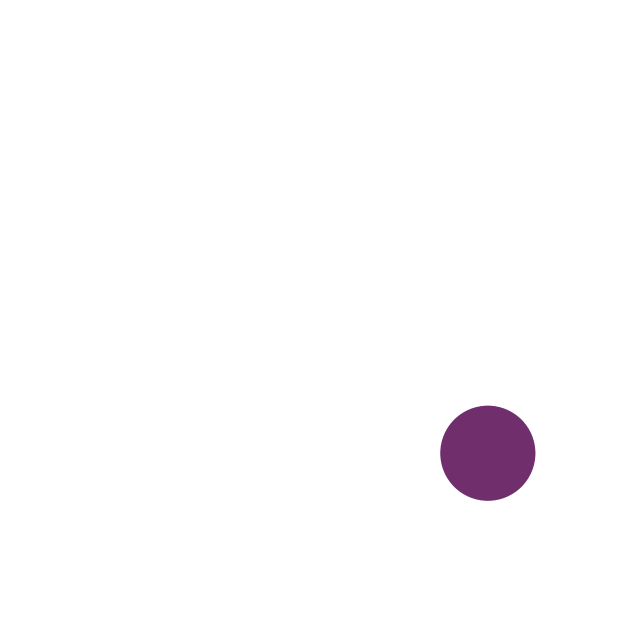

Saved generated_images/cumulative_shapes_2.png with 2 shape(s) at 384x384 resolution.


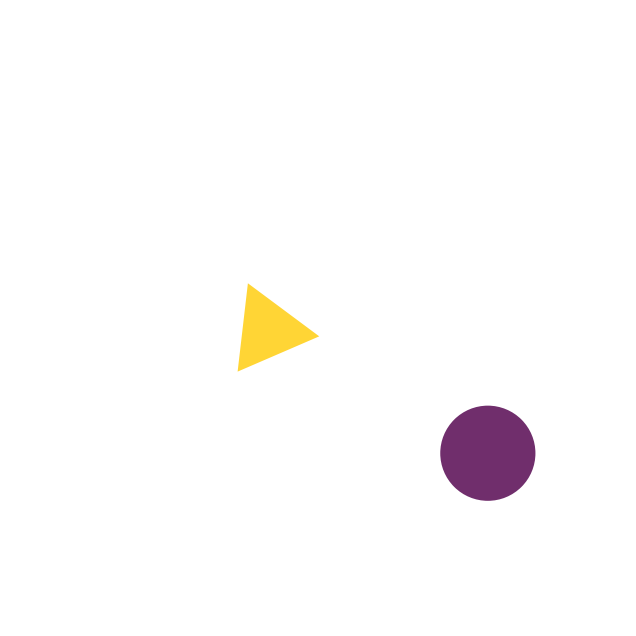

Saved generated_images/cumulative_shapes_3.png with 3 shape(s) at 384x384 resolution.


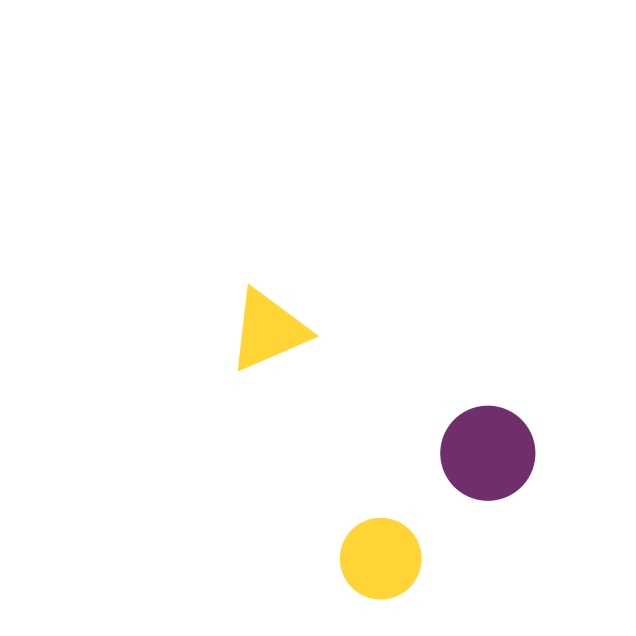

Saved generated_images/cumulative_shapes_4.png with 4 shape(s) at 384x384 resolution.


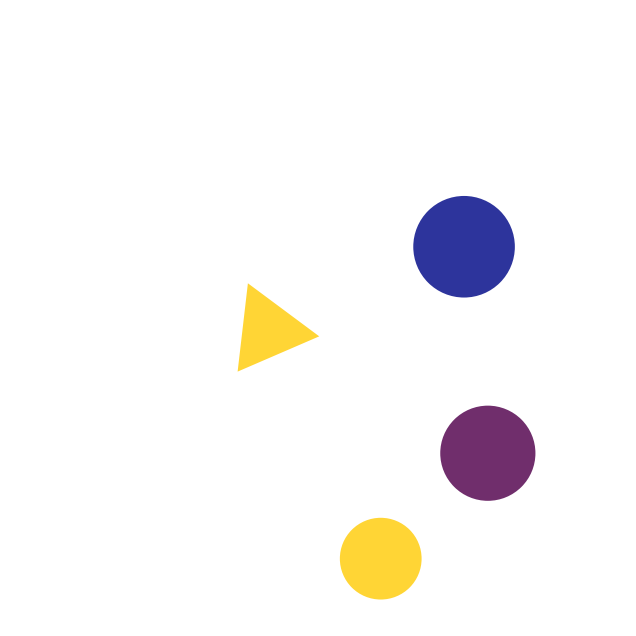

Saved generated_images/cumulative_shapes_5.png with 5 shape(s) at 384x384 resolution.


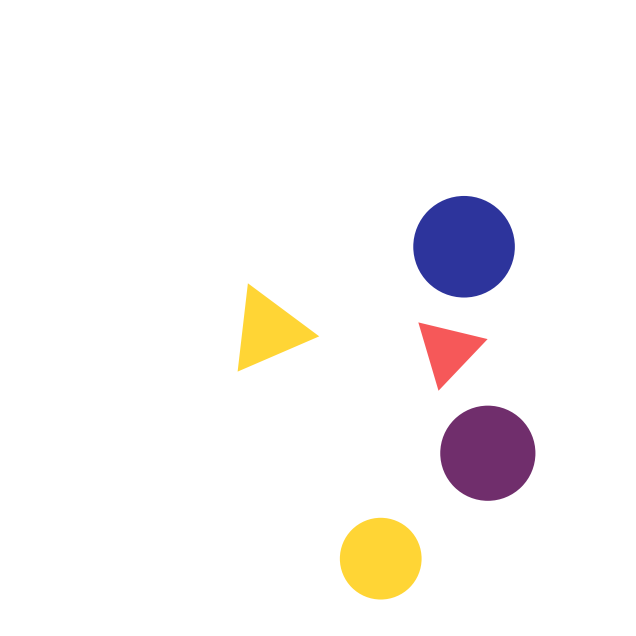

Saved generated_images/cumulative_shapes_6.png with 6 shape(s) at 384x384 resolution.


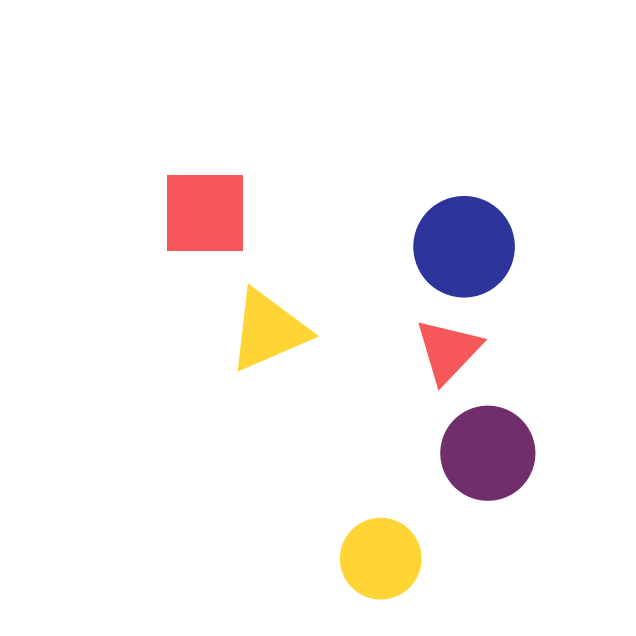

Saved generated_images/cumulative_shapes_7.png with 7 shape(s) at 384x384 resolution.


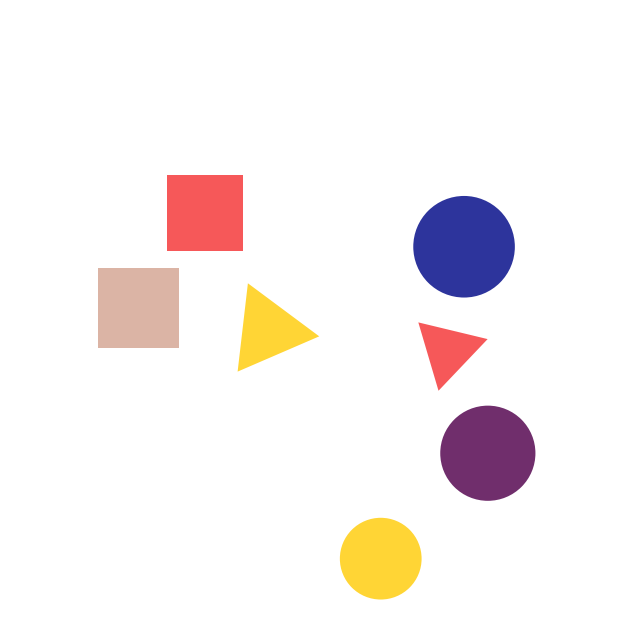

Saved generated_images/cumulative_shapes_8.png with 8 shape(s) at 384x384 resolution.


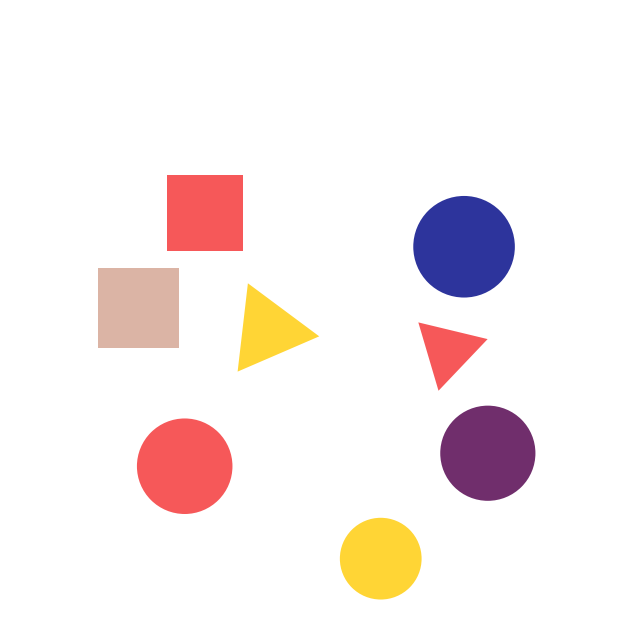

Saved generated_images/cumulative_shapes_9.png with 9 shape(s) at 384x384 resolution.


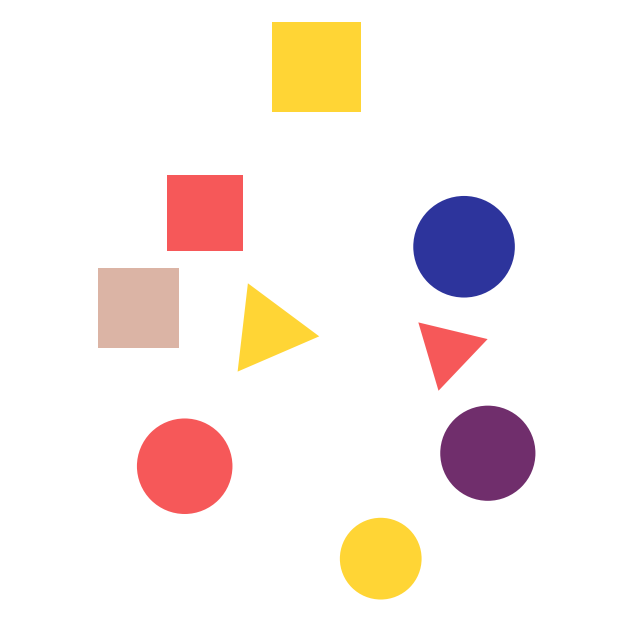

Saved generated_images/cumulative_shapes_10.png with 10 shape(s) at 384x384 resolution.


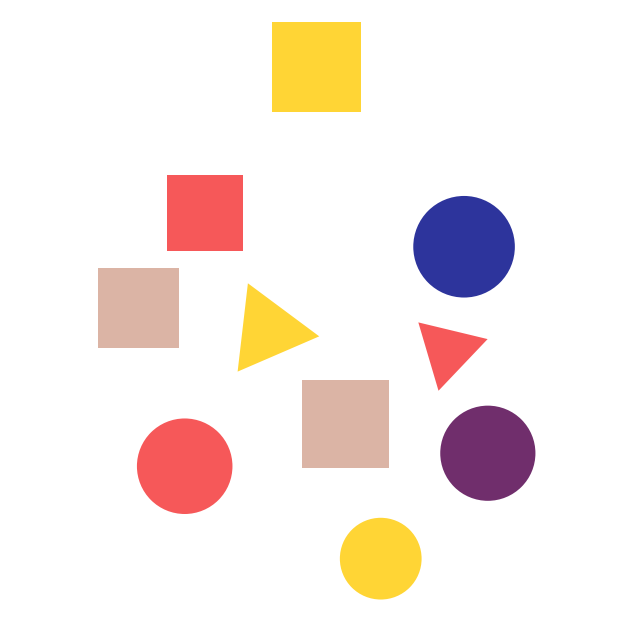

Saved generated_images/cumulative_shapes_11.png with 11 shape(s) at 384x384 resolution.


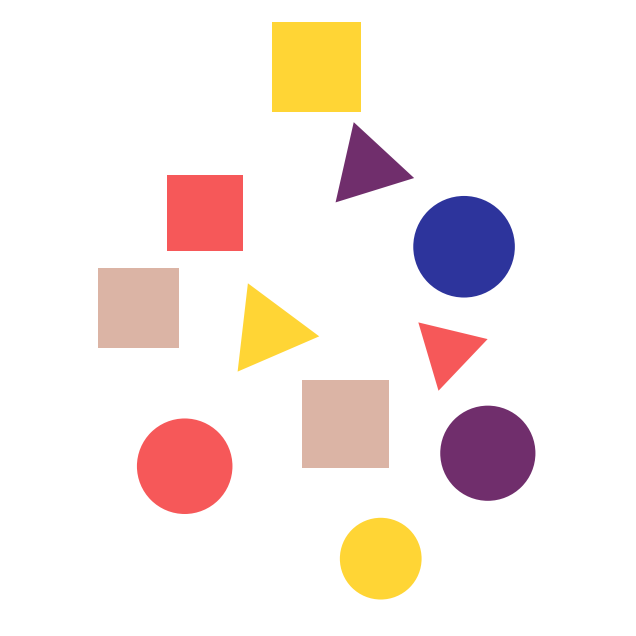

Saved generated_images/cumulative_shapes_12.png with 12 shape(s) at 384x384 resolution.


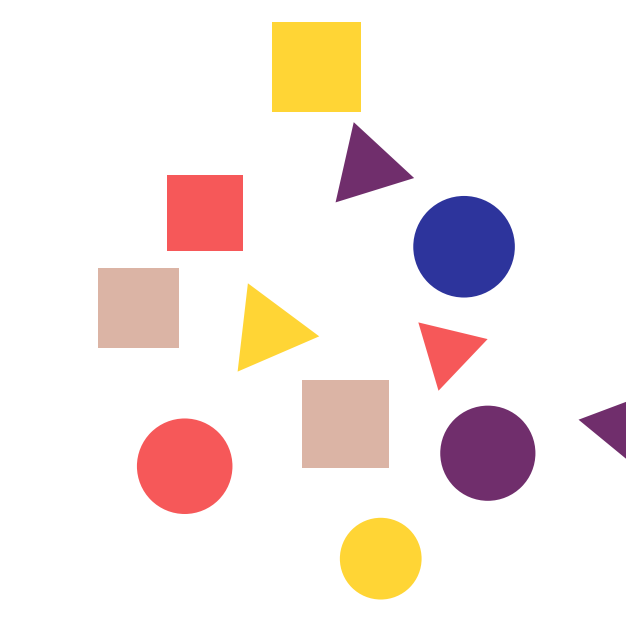

Saved generated_images/cumulative_shapes_13.png with 13 shape(s) at 384x384 resolution.


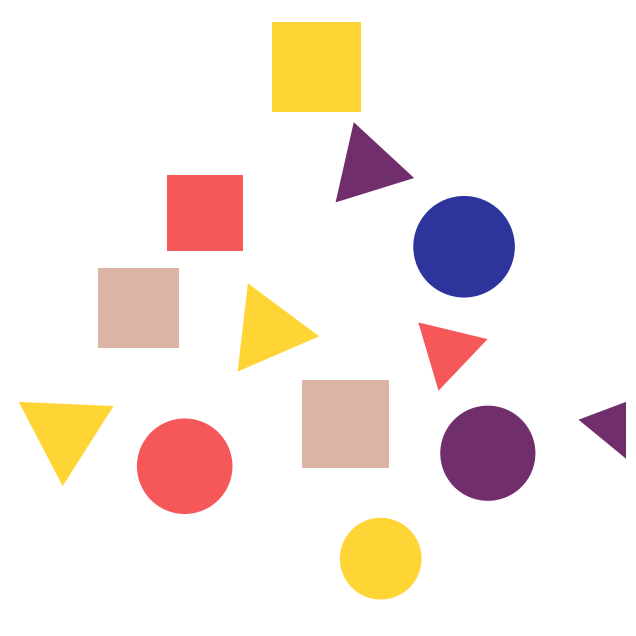

Saved generated_images/cumulative_shapes_14.png with 14 shape(s) at 384x384 resolution.


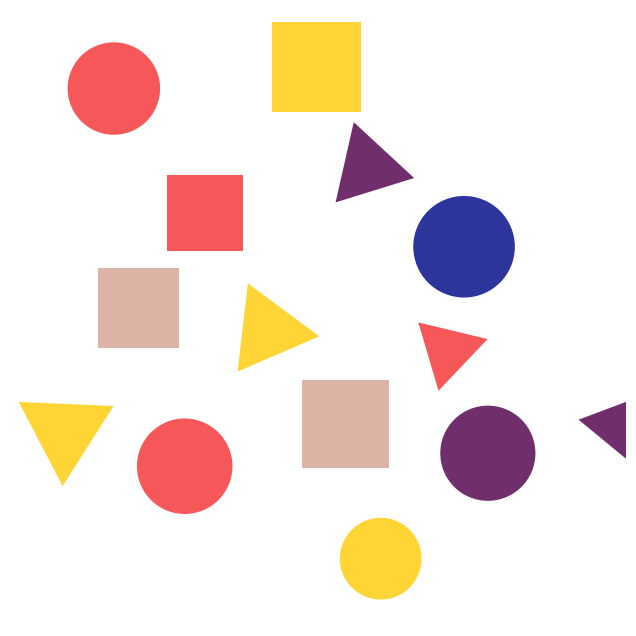

Saved generated_images/cumulative_shapes_15.png with 15 shape(s) at 384x384 resolution.


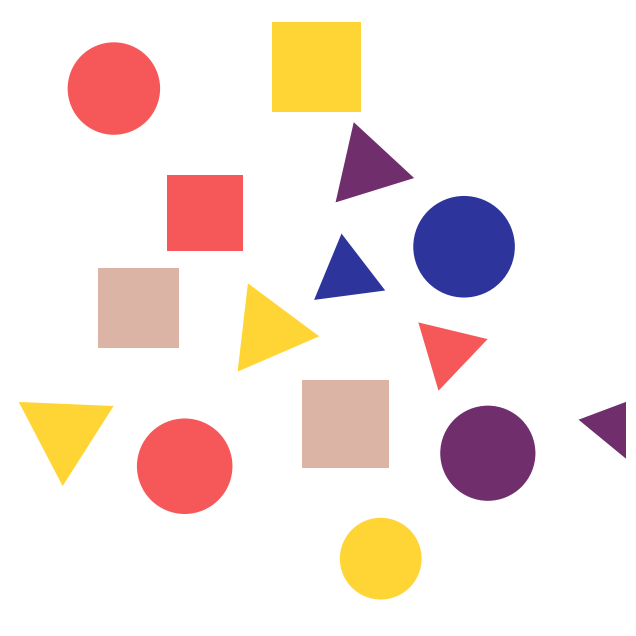

Saved generated_images/cumulative_shapes_16.png with 16 shape(s) at 384x384 resolution.


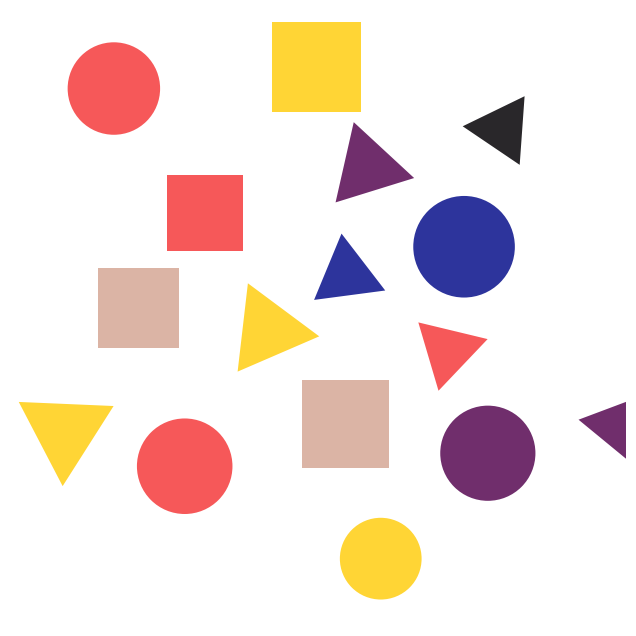

Saved generated_images/cumulative_shapes_17.png with 17 shape(s) at 384x384 resolution.


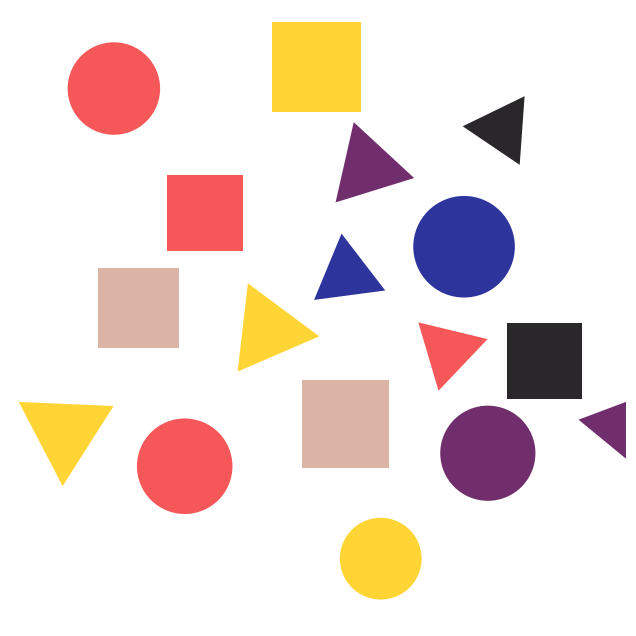

Saved generated_images/cumulative_shapes_18.png with 18 shape(s) at 384x384 resolution.


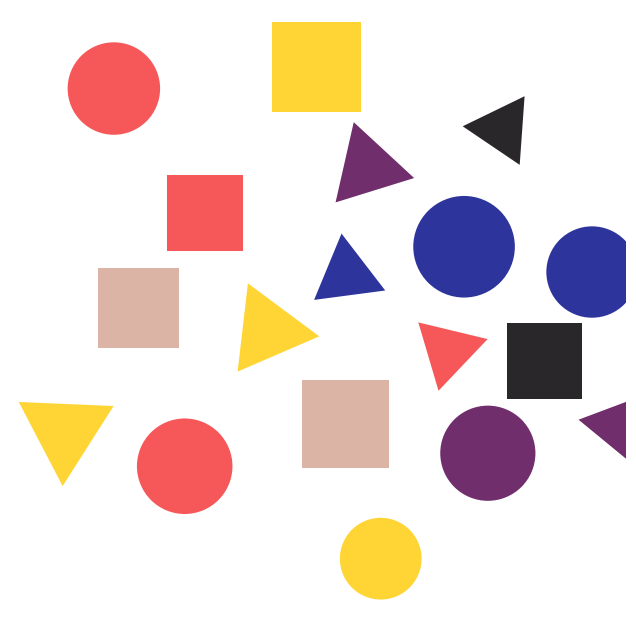

Saved generated_images/cumulative_shapes_19.png with 19 shape(s) at 384x384 resolution.


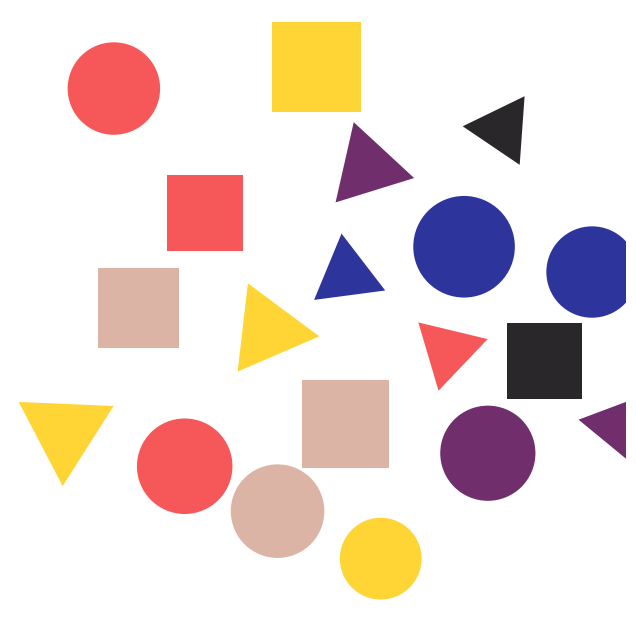

Saved generated_images/cumulative_shapes_20.png with 20 shape(s) at 384x384 resolution.


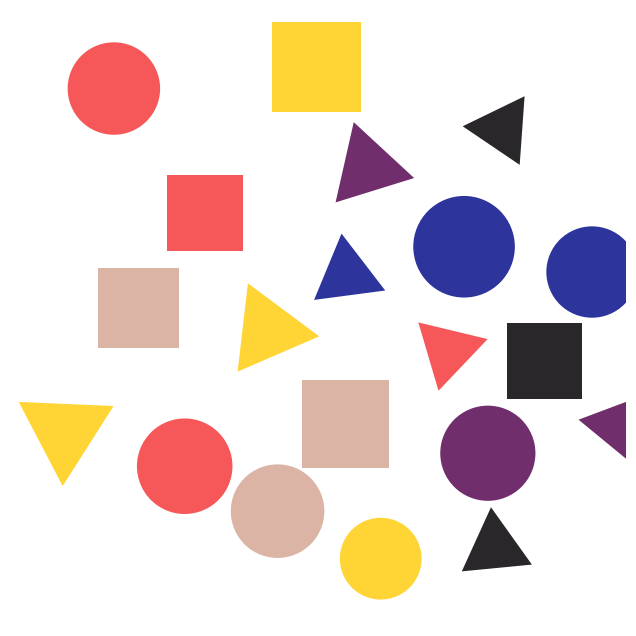

In [64]:
import math
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

# Apply a nice Seaborn theme.
sns.set_theme(style='whitegrid')

def random_mondrian_color():
    """
    Returns a random color from a Mondrian-inspired palette.
    The palette includes primary colors and white.
    """
    # from Mondrian paintings
    palette = ['#DBB4A5', '#702E6C', '#FFD535', '#2D349C', '#F65859', '#29272A']
    return random.choice(palette)

def get_effective_radius(shape):
    """
    Returns an effective radius for collision checking.
    - Circle: scale (its radius)
    - Rectangle: scale * sqrt(2) (since it's drawn as a square of side 2*scale)
    - Triangle: scale (inscribed in a circle of radius scale)
    """
    if shape['type'] == 'rectangle':
        return shape['scale'] * math.sqrt(2)
    else:
        return shape['scale']
def generate_shape_candidate(x_range, y_range, size_range):
    shape_type = random.choice(['circle', 'rectangle', 'triangle'])
    
    # Calculate the center of the range.
    center_x = (x_range[0] + x_range[1]) / 2
    center_y = (y_range[0] + y_range[1]) / 2
    
    # Set a standard deviation so most values fall near the center.
    std_x = (x_range[1] - x_range[0]) / 6  # ~99.7% values within x_range when using gauss
    std_y = (y_range[1] - y_range[0]) / 6

    # Sample from a normal distribution.
    cx = random.gauss(center_x, std_x)
    cy = random.gauss(center_y, std_y)
    
    # Clip to ensure the values remain within the defined range.
    cx = max(x_range[0], min(x_range[1], cx))
    cy = max(y_range[0], min(y_range[1], cy))
    
    s = random.uniform(*size_range)
    
    if shape_type == 'circle':
        return {
            'type': 'circle',
            'center': (cx, cy),
            'radius': s,
            'scale': s,
            'facecolor': random_mondrian_color()
        }
    elif shape_type == 'rectangle':
        return {
            'type': 'rectangle',
            'center': (cx, cy),
            'width': 2 * s,
            'height': 2 * s,
            'scale': s,
            'facecolor': random_mondrian_color()
        }
    elif shape_type == 'triangle':
        theta = random.uniform(0, 2 * math.pi)
        points = []
        for i in range(3):
            angle = theta + i * (2 * math.pi / 3)
            x = cx + s * math.cos(angle)
            y = cy + s * math.sin(angle)
            points.append([x, y])
        return {
            'type': 'triangle',
            'center': (cx, cy),
            'points': points,
            'scale': s,
            'facecolor': random_mondrian_color()
        }

def is_overlapping(shape, other):
    """
    Checks whether two shapes overlap, using the distance between their centers
    and comparing it to the sum of their effective radii.
    """
    r1 = get_effective_radius(shape)
    r2 = get_effective_radius(other)
    cx, cy = shape['center']
    ox, oy = other['center']
    distance = math.hypot(cx - ox, cy - oy)
    return distance < (r1 + r2)

def generate_non_overlapping_shape(existing_shapes, x_range, y_range, size_range, max_attempts=100):
    """
    Tries to generate a shape that does not overlap with any in existing_shapes.
    It makes up to max_attempts; if none is found, returns the last candidate.
    """
    candidate = None
    for _ in range(max_attempts):
        candidate = generate_shape_candidate(x_range, y_range, size_range)
        if all(not is_overlapping(candidate, other) for other in existing_shapes):
            return candidate
    return candidate  # Return candidate even if overlapping

def draw_shape(ax, shape):
    """Draws a single shape on the provided axes based on its definition."""
    if shape['type'] == 'circle':
        patch = patches.Circle(shape['center'], shape['radius'],
                               facecolor=shape['facecolor'], edgecolor='none', alpha=1.0)
        ax.add_patch(patch)
    elif shape['type'] == 'rectangle':
        cx, cy = shape['center']
        # Calculate bottom-left corner from the center.
        patch = patches.Rectangle((cx - shape['width'] / 2, cy - shape['height'] / 2),
                                  shape['width'], shape['height'],
                                  facecolor=shape['facecolor'], edgecolor='none', alpha=1.0)
        ax.add_patch(patch)
    elif shape['type'] == 'triangle':
        patch = patches.Polygon(shape['points'], closed=True,
                                facecolor=shape['facecolor'], edgecolor='none', alpha=1.0)
        ax.add_patch(patch)

# Define plotting ranges and image resolution.
x_range = (0, 20)         # Increased range for more scattered positioning.
y_range = (0, 20)
size_range = (1.2, 2)     # Scale for shape sizes.
resolution = 384          # Output resolution (1024x1024 pixels).

# Generate shapes one by one, trying to avoid overlaps.
total_shapes = 20
shapes_list = []
for _ in range(total_shapes):
    new_shape = generate_non_overlapping_shape(shapes_list, x_range, y_range, size_range, max_attempts=100)
    shapes_list.append(new_shape)

# Create cumulative images: image n contains shapes 1 to n (the earlier shapes remain unchanged).
for n in range(1, total_shapes + 1):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    for shape in shapes_list[:n]:
        draw_shape(ax, shape)
    
    # Set limits and maintain aspect ratio.
    ax.set_xlim(x_range[0], x_range[1])
    ax.set_ylim(y_range[0], y_range[1])
    ax.set_aspect('equal')
    
    # Remove the axis.
    ax.axis('off')
    

    # Calculate DPI so that the saved image is 1024x1024 pixels.
    dpi = resolution / fig.get_figwidth()
    filename = f"generated_images/cumulative_shapes_{n}.png"
    plt.savefig(filename, dpi=dpi, bbox_inches='tight', pad_inches=0)
    print(f"Saved {filename} with {n} shape(s) at {resolution}x{resolution} resolution.")
    
    plt.show()

    plt.close(fig)